# PROJECT 1: EULER'S METHOD
### Abstract
In this lab we were tasked to use the Euler's method to estimate the parameter of a free fall model. We did not have to write any code in this lab but we were told to estimate the value of a parameter b that will make the graph of the experimental model coincide with the drag model from the free fall equation:

$$ +bv^2 - mg = m \frac{dv}{dt} $$
To estimate a suitable parameter value, one has to apply the concept of terminal velocity, where at terminal velocity, drag force balances the weight of a free fall object and the free fall body tends to move at uniform velocity. I figured out that an estimated parameter that would cause coincidence in the graph of drag model and experimental model is 0.003625. I averagely figured out a value of terminal velocity from the graph of the experimental model. The scatter plot shows that there are different values of terminal velocity, this creates a sense of uncertainty in the value of b. Accounting for the maximum and minimum values we get a range of values for b which i got to be $ 0.0036 \pm 0.0003 $
### Description
The Euler's Method is a first order numerical procedure for solving ordinary differential equations with a given initial value. It is a first-order method, which means that the local error (error per step) is proportional to the square of the step size, and the global error (error at a given time) is proportional to the step size. The Euler method often serves as the basis to construct more complex methods. The primary significance of this project is to understand the use of Euler's method in motion prediction. 
### Algorithm and Discussion
The general formula for the Euler Method is $ y_{n+1} = y_n + hf(t_n, y_n) $ . For the free fall equation, the Euler's transformation should look like: $ V_{new} = V_{old} + (\frac{b(V_{old})^2}{m} - g)dt $ .  Note that to improve the accuracy in results from Euler's method, we need to shrink the value of the stepsize, h, which in this case is dt but we can't change anything about dt in this scenario so the best way to match the drag model with the experimental model is tweaking the variable which is the parameter, b. The way i found a suitable value of b is applying the concept of terminal velocity. When a free falling object approaches terminal velocity, $ \frac{dv}{dt} = 0 $. From the free fall equation, we can model it to a standard ordinary differential equation format and eliminate and variables on the left hand side standing with the rate of change. After doing this, the equation becomes: $$ \frac{dv}{dt} = +\frac{bv^2}{m} -g $$ Because at terminal velocity rate of change of velocity is zero, we can make b subject of the formula and this turns out to be: $$ b = \frac {mg}{v^2} $$ From the code and graph, i chose the terminal velocity to be of value -3.076 m/s, substituting this value into the above equation you obtain a parameter, b, of 0.003625.
### Implementation and code
A man drops coffee filters from a certain height and collects time and height at various instant. Here is what was obtained:


In [2]:
#
# Here is the raw data for the position of the muffin cup as a function of time. Use the "split" function to break it into
# a list of (possibly empty) strings.
#

data = """0.000000000E0	-2.688162330E0
3.336670003E-2	-4.301059729E0
6.673340007E-2	-5.376324661E0
1.001001001E-1	-6.989222059E0
1.334668001E-1	-1.129028179E1
1.668335002E-1	-1.451607658E1
2.002002002E-1	-2.043003371E1
2.335669002E-1	-2.526872591E1
2.669336003E-1	-3.118268303E1
3.003003003E-1	-3.870953756E1
3.336670003E-1	-4.623639208E1
3.670337004E-1	-5.430087907E1
4.004004004E-1	-6.236536606E1
4.337671004E-1	-7.150511799E1
4.671338005E-1	-8.010723744E1
5.005005005E-1	-8.924698937E1
5.338672005E-1	-9.892437376E1
5.672339006E-1	-1.080641257E2
6.006006006E-1	-1.177415101E2
6.339673006E-1	-1.274188945E2
6.673340007E-1	-1.370962788E2
7.007007007E-1	-1.467736632E2
7.340674007E-1	-1.575263126E2
7.674341008E-1	-1.672036969E2
8.008008008E-1	-1.768810813E2
8.341675008E-1	-1.865584657E2
8.675342009E-1	-1.973111150E2
9.009009009E-1	-2.075261319E2
9.342676009E-1	-2.182787812E2
9.676343010E-1	-2.284937981E2
""".splitlines()  # split this string on the "newline" character.

print("We have", len(data), "data points.")


We have 30 data points.


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

In [4]:
#
# Here we'll take the list of strings defined above and break it into actual numbers in reasonable units.
#

tlist = []
ylist = []
for s in data:
    t,y = s.split()     # break string in two
    t=float(t)          # convert time to float
    y=float(y)/100.0    # convert distance(centimeters to meters) to float
    tlist.append(t)
    ylist.append(y)
        
print ("tlist=",tlist)
print ("ylist=",ylist)

tlist= [0.0, 0.03336670003, 0.06673340007, 0.1001001001, 0.1334668001, 0.1668335002, 0.2002002002, 0.2335669002, 0.2669336003, 0.3003003003, 0.3336670003, 0.3670337004, 0.4004004004, 0.4337671004, 0.4671338005, 0.5005005005, 0.5338672005, 0.5672339006, 0.6006006006, 0.6339673006, 0.6673340007, 0.7007007007, 0.7340674007, 0.7674341008, 0.8008008008, 0.8341675008, 0.8675342009, 0.9009009009, 0.9342676009, 0.967634301]
ylist= [-0.0268816233, -0.04301059729, -0.05376324661, -0.06989222059, -0.1129028179, -0.1451607658, -0.2043003371, -0.2526872591, -0.3118268303, -0.3870953756, -0.4623639208, -0.5430087907, -0.6236536606, -0.7150511799, -0.8010723744, -0.8924698937, -0.9892437376, -1.0806412570000001, -1.177415101, -1.274188945, -1.370962788, -1.4677366319999998, -1.575263126, -1.672036969, -1.768810813, -1.865584657, -1.97311115, -2.075261319, -2.182787812, -2.284937981]


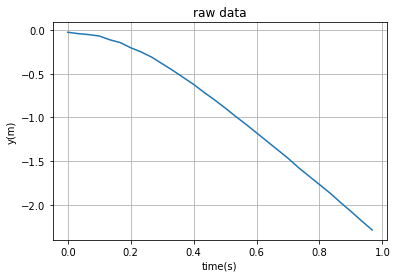

In [5]:
pl.plot(tlist, ylist)
pl.title("raw data")
pl.xlabel("time(s)")
pl.ylabel("y(m)")
pl.grid()

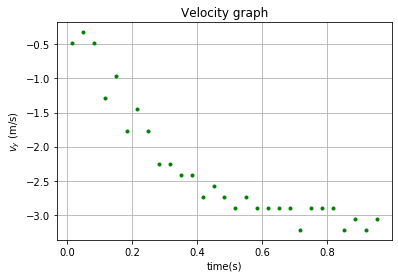

In [6]:
vlist = []  # Velocity list (computed velocities from experimental data)
tvlist = []  # time list (times for corresponding velocities)
for i in range(1,len(tlist)):
    dy=ylist[i]-ylist[i-1]
    dt=tlist[i]-tlist[i-1]
    vlist.append(dy/dt)
    tvlist.append((tlist[i]+tlist[i-1])/2.0)
    
pl.plot(tvlist,vlist,'g.')
pl.title("Velocity graph")
pl.xlabel("time(s)")
pl.ylabel("$v_y$ (m/s)")
pl.grid()

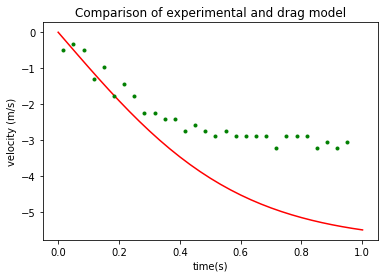

In [8]:
m=0.0035  # kg
g=9.8     # m/s
b=0.001    # total guess, need to improve

v=0.0     # start with zero velocity

dt = (tlist[-1]-tlist[0])/(len(tlist)-1)  # time per frame in original video
t=0.0

vclist = [v]
tclist = [t]

def deriv(v, t):
    return b*v**2/m - g

for i in range(len(tlist)):
    dv = deriv(v,t)*dt
    v += dv
    t += dt
    
    vclist.append(v)
    tclist.append(t)
    
pl.title("Comparison of experimental and drag model")
pl.xlabel("time(s)")
pl.ylabel("velocity (m/s)")
pl.plot(tclist, vclist, 'r-',tvlist,vlist,'g.')

We can see that using the parameter, b of 0.001, Euler's method proved too inaccurate. applying the concept of terminal velocity, where at terminal velocity, drag force balances the weight of a free fall object and the free fall body tends to move at uniform velocity. From the code and graph, i chose the terminal velocity to be of value -3.076 m/s, substituting this value into the equation : $$ b = \frac {mg}{v^2} $$ we obtain a suitable value of 0.003625 for b.

In [29]:
v_avg = -3.076
b_avg = (m * g)/(v_avg**2)
print ("b_avg = ", b_avg)
v_min = -2.9
b_min = (m * g)/(v_min**2)
print ("b_min = ", b_min)
v_max = -3.22
b_max = (m * g)/(v_max**2)
print ("b_max = ", b_max)


b_avg =  0.0036251122410845492
b_min =  0.004078478002378122
b_max =  0.0033081285444234404


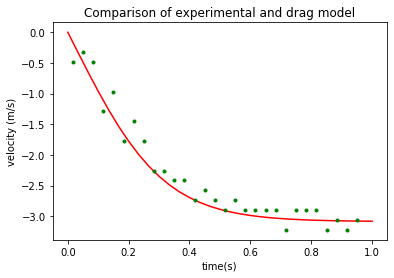

In [28]:
m=0.0035  # kg
g=9.8     # m/s
b=0.0036   # total guess, need to improve

v=0.0     # start with zero velocity

dt = (tlist[-1]-tlist[0])/(len(tlist)-1)  # time per frame in original video
t=0.0

vclist = [v]
tclist = [t]

def deriv(v, t):
    return b*v**2/m - g

for i in range(len(tlist)):
    dv = deriv(v,t)*dt
    v += dv
    t += dt
    
    vclist.append(v)
    tclist.append(t)
    
pl.title("Comparison of experimental and drag model")
pl.xlabel("time(s)")
pl.ylabel("velocity (m/s)")
pl.plot(tclist, vclist, 'r-',tvlist,vlist,'g.')



### Conclusion
   The drag model and experimental model coincided when the parameter value was changed to a suitable value. In thus scenario of Euler's method, the stepsize dt, can't be chnaged to improve accuracy so one had to tweak the parameter which in this code can be changed because it was a guessed value. So as to avoid multiple guesses and iterations to get a suitable parameter value, one can apply the terminal velocity concept, modify the free fall equation, observe the graph and code to find a reasonable value for terminal velocity and solve for b. The scatter plot of the experimental model shows that there are different values of terminal velocity, this creates a sense of uncertainty in the value of b. Accounting for the maximum and minimum values we get a range of values for b which i got to be  0.0036 ± 0.0003